In [ ]:
import numpy as np

In [95]:
class LinearRegression:
  def __init__(self):
      self.line_eqn = [] #hold the diff values of thetas.

  def fit(self,X,y,alpha,epochs,**kwargs):
      """
      Take in numpy array X, y and theta and update theta by taking   epochs gradient steps
      with learning rate of alpha
      
      return theta, y-intercept and list of the cost of theta during each  iteration
      """
      
      m=len(y)
      J_history=[]
      self.theta = np.zeros((X.shape[1],1)) 
      self.b = 0
      y = y.reshape(-1,1)

      for i in range(epochs):
          # print(self.theta)
          self.line_eqn.append(np.copy(self.theta))
          predictions = X.dot(self.theta) + self.b
          error = np.dot(X.transpose(),(predictions -y))
          descent=alpha * 1/m * error
          self.theta-=descent
          self.b = self.b - alpha * 1/m * np.sum(predictions -y)
          J_history.append(self.computeCost(X,y,self.theta,self.b))

      return self.theta, self.b, J_history

  def computeCost(self,X,y,w,b):
      """
      Take in a numpy array X,y, w,b and generate the cost function of using theta(w) as parameter in a linear regression model
      """
      m=len(y)
      predictions=X.dot(w) + b  #y = w.x+b
      square_err=(predictions - y)**2   #f(x(i))-y(i)
      cost = 1/(2*m) * np.sum(square_err)
      return cost

  @property
  def line(self):
      """
      Returns the calculated parameters of the model 
      """
      return self.theta, self.b

  def predict(self,x):
      """
      x - input features
      """
      prediction = x.dot(self.theta) + self.b
      return prediction

  def visualise(self,X,y,test_x):
      """
      X - Train input Data for Scatter Plot
      y - Train output Data for Scatter Plot
      test_x - Data for testing and plotting
      """
      try:
        plt.scatter(X, y, label="Actual Value");
        plt.plot(X, self.predict(test_x), label="Predicted Value",c="r"); 
        plt.xlabel("x"); 
        plt.ylabel("y"); 
        plt.legend(); 
        plt.show()
      except Exception as err:
        print(err)
        print("Visualision works with univariable dataset")

In [67]:
x = np.arange(0, 20, 1)
y = 1 + x**2
X = x.reshape(-1, 1)

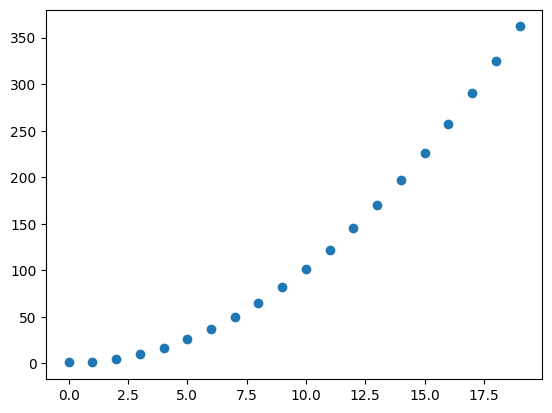

In [68]:
plt.scatter(X,y)

In [69]:
lr = LinearRegression()

In [70]:
x = x.reshape(-1,1)

In [71]:
X = X.reshape(-1,1)

In [72]:
y = y.reshape(-1,1)

In [73]:
theta,b,loss = lr.fit(x,y,1e-2,1000)

In [74]:
theta,b

(array([[18.69806954]]), -52.08341025448668)

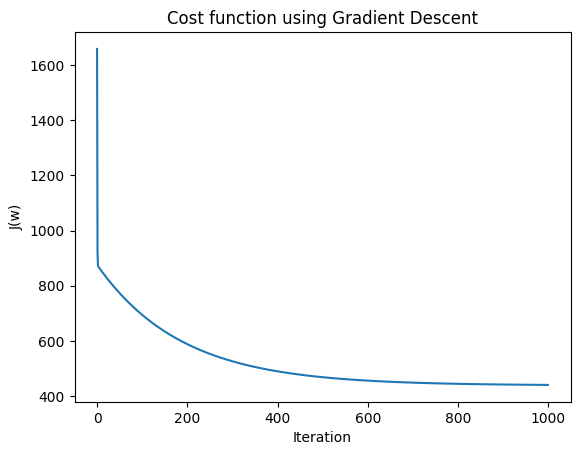

In [75]:
plt.plot(loss)
plt.xlabel("Iteration")
plt.ylabel("J(w)")
plt.title("Cost function using Gradient Descent")
plt.show()

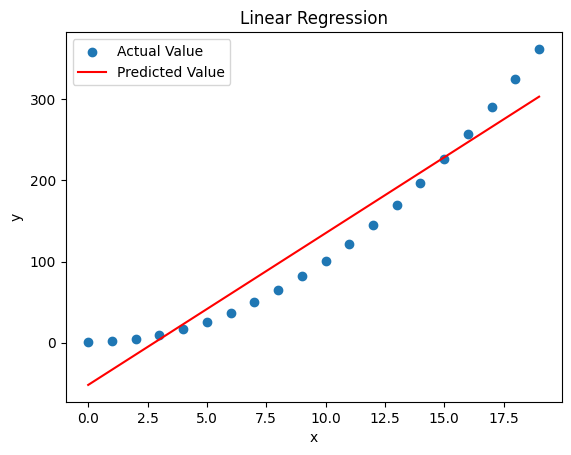

In [108]:
plt.title("Linear Regression")
lr.visualise(x,y,x)

In [82]:
# create target data
x1 = np.arange(0, 20, 1)
y1 = 1 + x1**2

# Engineer features 
X = x1**2      

print(x1)
print(y1)
print(X)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[  1   2   5  10  17  26  37  50  65  82 101 122 145 170 197 226 257 290
 325 362]
[  0   1   4   9  16  25  36  49  64  81 100 121 144 169 196 225 256 289
 324 361]


In [131]:
model = LinearRegression()

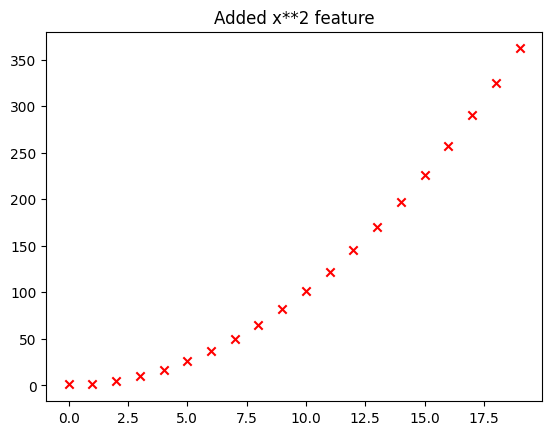

In [86]:
plt.scatter(x1, y1, marker='x', c='r', label="Actual Value"); 
plt.title("Added x**2 feature")
plt.show()

In [87]:
X = X.reshape(-1,1)

In [132]:
param_w,param_b,hist = model.fit(X,y1,1e-5,1000)

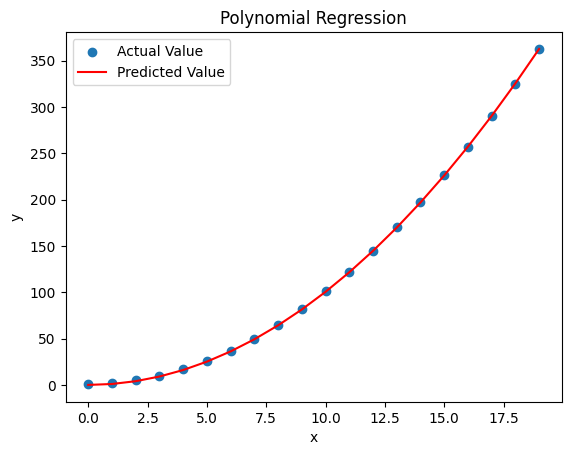

1.0044x² + 0.008956967008735975


In [133]:
plt.title("Polynomial Regression")
model.visualise(x1,y1,X)
print(str(round(model.line[0][0][0],4)) + "x² + " + str(model.line[1]))

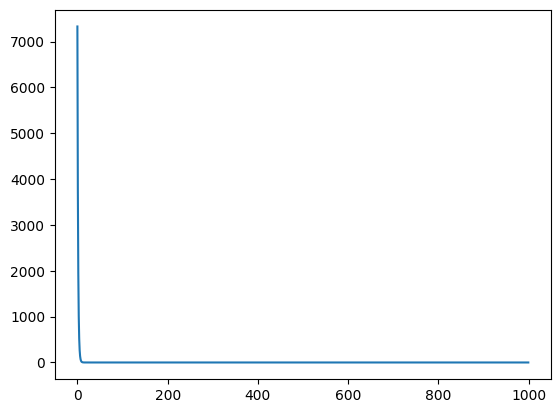

In [134]:
plt.plot(hist)